In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.random.uniform(-50,50,70)

In [14]:
def line (x, m=1, b=0):
    '''Line function'''
    y = m*x+b 
    #adding noise
    #return y
    return y +np.random.randn(len(y))*np.sqrt(np.abs(y))

In [15]:
y = line(x)

<Container object of 3 artists>

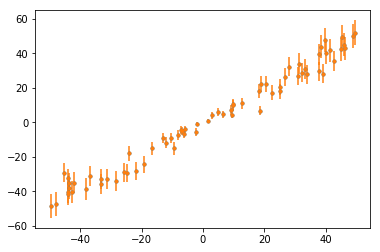

In [61]:
pl.plot(x,y,'.')
#below to take our uncertainties into account
yerr=np.abs(y)**0.5
pl.errorbar(x,y,yerr=np.abs(y)**0.5, fmt='.')

In [50]:
import statsmodels.api as sm

In [51]:
#linmodel = sm.OLS(endog=y,exog=x).fit()
#the above was not accurate, cause only gave 1 dimension

linmodel = sm.OLS(endog=y,exog=sm.add_constant(x)).fit()

In [52]:
linmodel.fittedvalues;

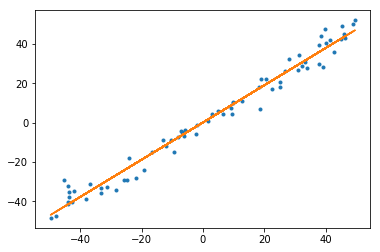

In [53]:
pl.plot(x,y,'.')
pl.plot(x,linmodel.fittedvalues,'-')

In [54]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2829.
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           3.87e-57
Time:                        20:22:50   Log-Likelihood:                -204.83
No. Observations:                  70   AIC:                             413.7
Df Residuals:                      68   BIC:                             418.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0595      0.549      0.108      0.914        -1.036     1.155
x1             0.9454      0.018     53.189      0.000         0.910     0.981
==============================================================================
Omnibus:                        1.582   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                0.932
Skew:                           0.220   Prob(JB):                        0.627
Kurtosis:                       3.355   Cond. No.                         31.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
linmodel.params

array([ 0.05951304,  0.9453772 ])

In [62]:
wmodel = sm.WLS(endog=y,exog=sm.add_constant(x),weights=1.0/yerr).fit()

In [63]:
wmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            WLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2275.
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           5.28e-54
Time:                        20:24:08   Log-Likelihood:                -201.62
No. Observations:                  70   AIC:                             407.2
Df Residuals:                      68   BIC:                             411.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2102      0.492     -0.427      0.671        -1.192     0.771
x1             0.9327      0.020     47.698      0.000         0.894     0.972
==============================================================================
Omnibus:                        2.463   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.742
Skew:                          -0.225   Prob(JB):                        0.418
Kurtosis:                       3.628   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
import statsmodels.formula.api as smf

In [48]:
dir (smf)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PHReg',
 'Poisson',
 'Probit',
 'QuantReg',
 'RLM',
 'WLS',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'gee',
 'glm',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

In [ ]:
#import pandas as pd
#df = 
#smf.ols('y - x', data=df_).fit
